<a href="https://colab.research.google.com/github/fedhere/FDSfE_FBianco/blob/main/HW4/linear_regression_in_detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTE: its the same notebook used in class! just some added comments and removed output

# Data 

1970s — Marc and Helen Bernstein showed that walking speed is proportional to population size

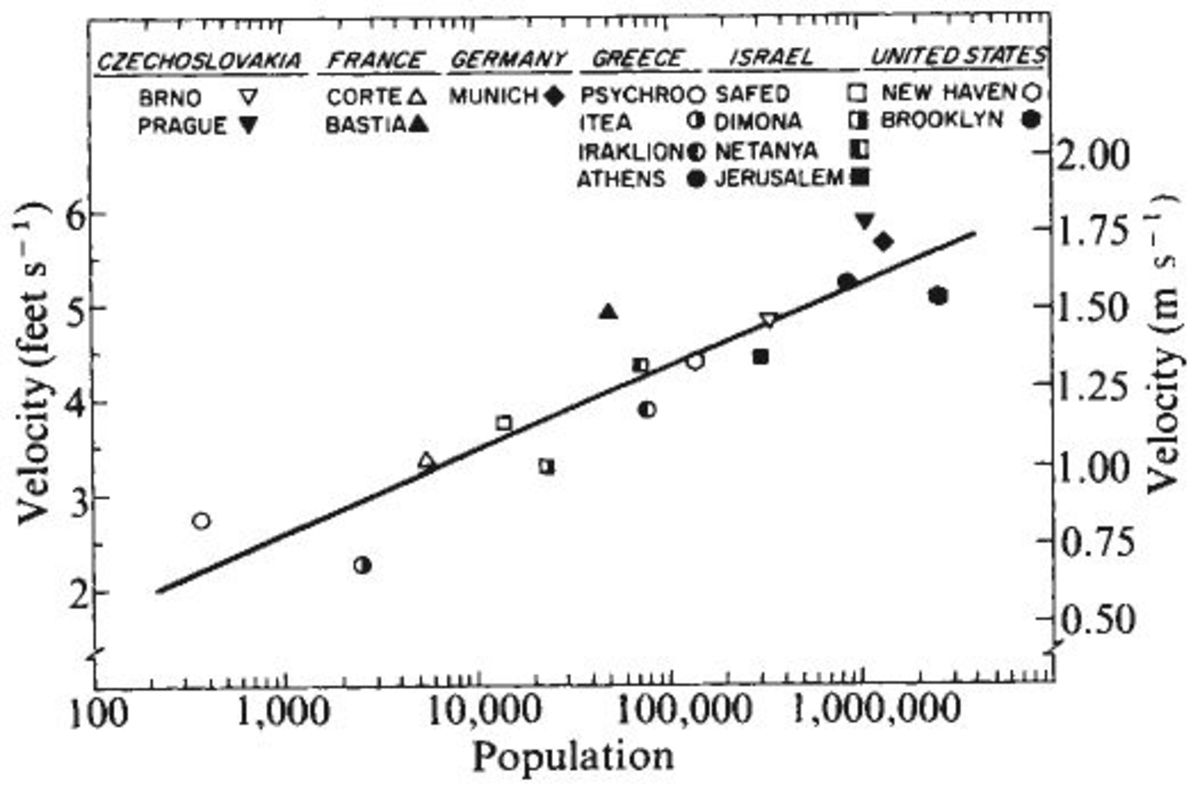

Bettencourt West et al. 2007 https://www.pnas.org/content/104/17/7301
(the top plot) is where I digitized the data from. Also read if you want https://www.bloomberg.com/news/articles/2012-03-21/why-people-in-cities-walk-fast

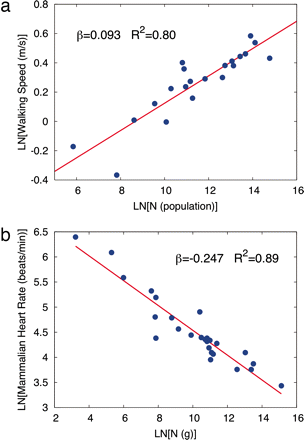

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/walkingsped_Bettencourt07.csv", 
                   header=None, names=["population", "wspeed"])

In [ ]:
df

,population,wspeed
0,2520.0,2.28
1,370.0,2.79
2,5650.0,3.37
3,14100.0,3.76
4,23300.0,3.31
5,52600.0,4.91
6,73300.0,4.40
7,77100.0,3.90
8,145000.0,4.40
9,320000.0,4.49


In [ ]:
import numpy as np
df["population"] = np.log10(df.population)

In [ ]:
import pylab as plt

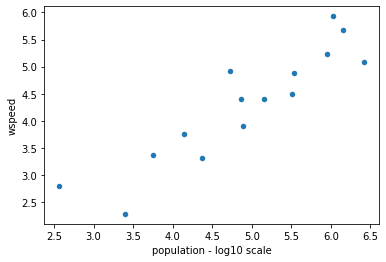

In [ ]:
df.plot("population", "wspeed", kind="scatter")
plt.xlabel("population - log10 scale");

# fastest fit 
use seaborn (plotting package)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


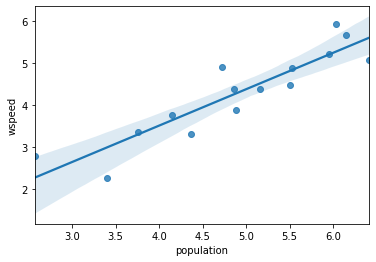

In [ ]:
import seaborn as sns
sns.regplot(df['population'], df['wspeed'])
plt.show()

# minimize the objective function: 
you can do it entirely by end and miminize the objective function in a for loop. 
 this is slow and inefficient


In [ ]:
# objective function: sum squared errors (SSE)
def sumsqerror(y, yp):...


In [ ]:
sumsqerror(df.wspeed.values, df.prediction.values)

2.758155314005622

In [ ]:
minnow = 1e7
for s in np.arange(0, 3, 0.01):
  for i in np.arange(0, 2.5, 0.01):
    prediction = df["population"] * s + i

    sse = sumsqerror(df.wspeed, prediction)
    if sse < minnow:
      minnow = sse
      slope_manual, inrercept_manual = s, i

slope_manual, inrercept_manual

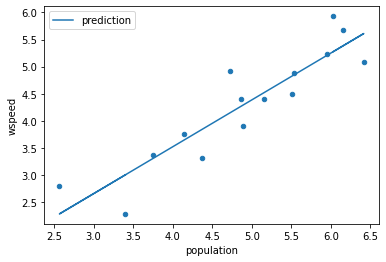

In [ ]:
# your code here
...

# many ways to fit a line to data with python
## with numpy find the best slope and intercept 

In [ ]:
# finish up the code here to get the output I got
np.polyfit(...

array([0.8653381 , 0.05664889])

In [ ]:
# finish up the code here to get the output I got
...

,population,wspeed,prediction
0,3.401401,2.28,3.000010
1,2.568202,2.79,2.279012
2,3.752048,3.37,3.303439
3,4.149219,3.76,3.647126
4,4.367356,3.31,3.835888


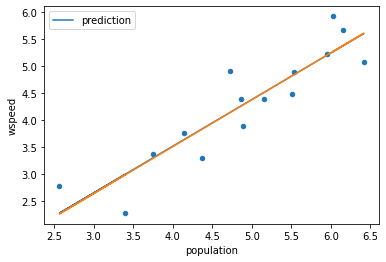

In [ ]:
ax = df.plot("population", "wspeed", kind="scatter")
df.plot("population", "prediction", kind="line", ax=ax)
ax.plot(df.population, df['population'] * slope_manual + inrercept_manual );

a slope of 0.85 means that if I double the x value the y values grows by 0.85 * 2 = 1.7. This is a "sublinear growth" meaning that the y value grows slower than the x value (superlinear would be if slope > 1)

same result as the earlier figure, up to numerical precision of my loop steps


## with sklearn find the best slope and intercept

In [ ]:
# finish up the code here to get the output I got
from sklearn.linear_model import LinearRegression
lm = LinearRegression(...

(array([0.8653381]), 0.05664889151453334)

# using statsmodels
ADVANTAGE: this provide thorough diagnostics to assess the model's merit

## statsmodels OLS

In [ ]:
import statsmodels.api as sm
# Let's declare our X and y variables
X = df['population']
y = df['wspeed']
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,population
0,1.0,3.401401
1,1.0,2.568202
2,1.0,3.752048
3,1.0,4.149219
4,1.0,4.367356


In [ ]:
# finish up the code here to get the output I got
model = sm.OLS(...
# Show the summary
results.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           3.21e-06
Time:                        03:34:27   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0566      0.560      0.101      0.921      -1.154       1.267
population     0.8653      0.112      7.740      0.000       0.624       1.107
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.531
Skew:                           0.115   Prob(JB):                        0.767
Kurtosis:                       2.107   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Stats Models Formula methods

check the slide to see how to read the diagnostics

In [ ]:
#alternative: statsmodel formula that could be useful if you wanted to create more complicated models
import statsmodels.formula.api as smf

In [ ]:
# finish up the code here to get the output I got
mod = smf.ols(formula=...
res.summary();

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           3.21e-06
Time:                        03:34:27   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0566      0.560      0.101      0.921      -1.154       1.267
population     0.8653      0.112      7.740      0.000       0.624       1.107
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.531
Skew:                           0.115   Prob(JB):                        0.767
Kurtosis:                       2.107   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res.predict()

array([3.00001037, 2.27901169, 3.30343936, 3.64712627, 3.83588836,
       4.14189772, 4.26660871, 4.28560323, 4.52297726, 4.8204649 ,
       4.84435204, 5.20740779, 5.61064953, 5.38045839, 5.27410438])

# Extra Credit

In [ ]:
# finish up the code here to get the output I got

# fit a quadratic model a*pop^2 + b*pop + const
mod = smf.ols(formula= ...

res2.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     28.41
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           2.81e-05
Time:                        03:34:27   Log-Likelihood:                -8.4158
No. Observations:                  15   AIC:                             22.83
Df Residuals:                      12   BIC:                             24.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0889      2.067      0.527      0.608      -3.415       5.593
I(population ** 2)     0.0513      0.099      0.520      0.613      -0.164       0.266
population             0.3916      0.918      0.426      0.677      -1.609       2.392
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.238
Skew:                           0.051   Prob(JB):                        0.888
Kurtosis:                       2.392   Cond. No.                         507.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# If you get here the rest is fully compiles and you shoudl be able to follow the demonstration that a line fit is better than a curve fit for these data

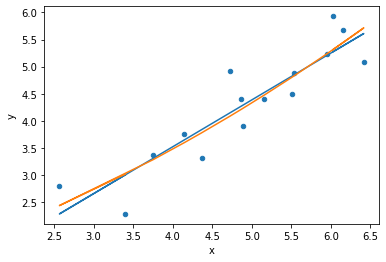

In [ ]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df.population, res.predict(df))
ax.plot(df.population, res2.predict(df))
plt.xlabel('x')
plt.ylabel('y');

the curve fit is similar to the line fir: is it actually better?

# We set a p-value threshold of p-value 0.05

In [ ]:
res2.compare_lr_test(res)

(0.3342540144461843, 0.5631648421666332, 1.0)

In [ ]:
print('likelihood ration test - set alpha to alpha=0.05\n\n' ,  
      'the NH is that the simpler model (line) is at least as good as the more complex one (curve)\n\n' ,
'''the likelihood ratio statistics is {0:.2f}, which corresponds to a p-value of {1:.2f}\n
since the p-value is > 0.05 we cannot reject the null hypothesis that the '''.format(*res2.compare_lr_test(res)))

# uncertainty

In [ ]:
res.params

In [ ]:
res.conf_int()

# How to measure the influence of a point on the fit

In [ ]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(res, alpha=0.05)
data.shape

In [ ]:

predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,4:6].T
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df.population, res.predict(df))
ax.fill_between(df.population.values, predict_ci_low, predict_ci_upp, alpha=0.5)

# influence points



In [ ]:
sm.graphics.influence_plot(res);

In [ ]:
sm.graphics.influence_plot(res2);

This function creates a “bubble” plot of Studentized residuals versus hat leverage values. The influence plot helps you identify data points that might have strong influence over the model fit. Unusual data points can be unusual because they have an unusual X values (at the edge of the distribution), or because their y value is an "outlier". Points that are both are on the top right of the plot and are high influence points. The influence of the point measured as Cook's distance is represented by the size of the bubble.